### **2. 알고리즘 선택**

- **데이터 구성**
    - 전체: 180,000개 / 학습: 180,000개 (비지도 학습) / 신규: 20,000개

- **클러스터링 설정**
    - 알고리즘: K-means  
    - 클러스터 수: k=20 (`k=3~25` 중 실루엣 점수 최적, 엘보우 너무 완만하여 실루엣 점수로)

- **사용 특성**
    - 총 6개: `weight_kg`, `height_cm`, `size`, `age`, `fit`, `body type`  
    - 추천 지표: `rating_5` (추천 시만 사용)

- **결측값 처리**
    - weight ↔ size: 높은 상관관계 (0.855)  
    - 초기: 전체 평균 → 수정: 사이즈별 평균으로 대체
    - 결과: 전체평균과 사이즈별 평균 비슷하나 변수간 관계 최대한 보존 위해 후자 선택

- **몸무게 결측값 처리**
    - 몸무게와 사이즈 간 높은 상관관계 확인
    - 초기: 전체 평균으로 대체  
    - 수정: 사이즈별 평균 몸무게로 변경하여 더 정밀한 처리 

- **고려 중인 이슈**
    - 범주형 피처(원핫 인코딩 후, 피처 수 증가)가 클러스터링 결과에 왜곡 일으킴
    - PCA 시각화 결과: 군집들이 잘 뭉쳐 있음, body type을 기준으로 군집 나뉨
    - body type 제거 시: 실루엣 점수가 크게 낮아짐 → body type이 중요한 분류 기준 
    - 범주형 피처에 가중치 부여 방안 논의

전체 데이터 크기: (192544, 15)
원본 rating 고유값: [10.  8.  4.  6.  2. nan]
학습 데이터 크기: (173289, 9), 새로운 데이터 크기: (19255, 9)
학습 데이터 rating_5 고유값: [4 5 3 2 1]

weight_kg와 size 상관계수:
           weight_kg      size
weight_kg   1.000000  0.850954
size        0.850954  1.000000

size별 weight_kg 평균:
Size 0: 49.66 kg
Size 1: 51.28 kg
Size 2: 53.99 kg
Size 3: 53.20 kg
Size 4: 54.66 kg
Size 5: 57.78 kg
Size 6: 60.10 kg
Size 7: 56.79 kg
Size 8: 58.62 kg
Size 9: 61.24 kg
Size 10: 65.77 kg
Size 11: 60.41 kg
Size 12: 62.34 kg
Size 13: 64.97 kg
Size 14: 64.67 kg
Size 15: 64.87 kg
Size 16: 66.22 kg
Size 17: 68.42 kg
Size 18: 74.84 kg
Size 19: 66.66 kg
Size 20: 70.84 kg
Size 21: 72.88 kg
Size 22: 75.69 kg
Size 23: 71.79 kg
Size 24: 75.51 kg
Size 25: 77.74 kg
Size 26: 81.00 kg
Size 27: 73.68 kg
Size 28: 81.52 kg
Size 29: 84.08 kg
Size 30: 90.95 kg
Size 32: 86.27 kg
Size 33: 90.64 kg
Size 34: 95.99 kg
Size 35: 87.81 kg
Size 36: 90.92 kg
Size 37: 81.65 kg
Size 38: 85.79 kg
Size 39: 92.40 kg
Size 40: 95.08 kg
Size 41:

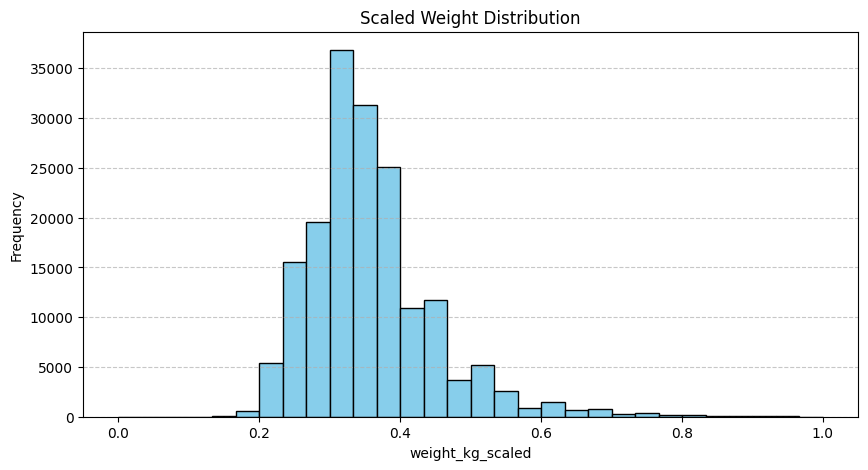

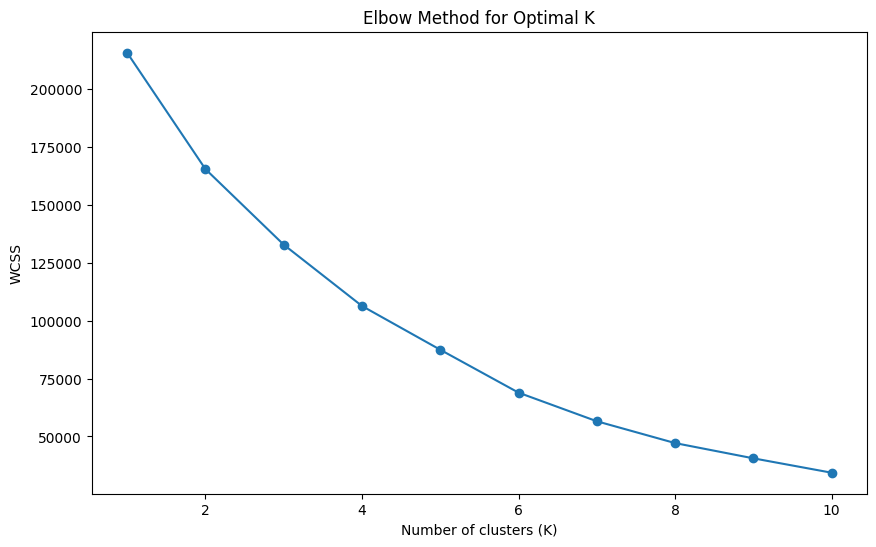


학습 데이터 군집별 실제 값 평균:
         weight_kg   height_cm       size        age  rating_5
cluster                                                       
0        67.735830  165.083595  15.872093  34.285684  4.366808
1        65.398191  166.302069  13.921744  33.925851  4.657509
2        62.499168  167.589678  12.930501  33.840653  4.235141
3        61.819918  167.602460  10.479967  33.777715  4.665207
4        66.030737  166.476546  15.971442  33.917460  4.198365
5        66.062894  166.732015  13.950579  33.796558  4.625129
6        53.186640  158.429838   5.321985  33.178004  4.668133
7        68.931316  165.591285  17.893399  35.091540  4.626175
8        64.915389  166.006513  12.493583  33.487175  4.318948
9        57.175133  169.736492   7.159681  33.323991  4.686092
10       72.398559  165.199969  21.193992  36.619976  4.565676
11       65.828683  166.410887  12.597398  33.600710  4.322785
12       53.979889  158.424992   7.754777  33.657052  4.289411
13       66.383856  166.506511  15

C:\Users\user\AppData\Local\Temp\ipykernel_10552\1073816635.py:163: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_items = train_df.groupby('cluster').apply(



새로운 데이터 군집 분포:
cluster
1     5130
3     3230
6     1672
5     1548
9     1097
7     1093
4      949
8      891
2      593
14     533
10     358
11     347
16     285
13     282
12     279
15     232
17     211
0      202
19     179
18     144
Name: count, dtype: int64
새로운 데이터 실루엣 점수: 0.830
새로운 데이터 추천 상품의 높은 평점 비율 (평균): 0.812

새로운 데이터에 대한 군집별 추천 상품:
Cluster 9 추천 상품:
  Item ID: 2826127, Rating: 5
  Item ID: 126335, Rating: 5
  Item ID: 1309537, Rating: 5
  Item ID: 1834911, Rating: 5
  Item ID: 826672, Rating: 5
Cluster 4 추천 상품:
  Item ID: 1173459, Rating: 5
  Item ID: 922038, Rating: 5
  Item ID: 141548, Rating: 5
  Item ID: 1135080, Rating: 5
  Item ID: 206536, Rating: 5
Cluster 7 추천 상품:
  Item ID: 283978, Rating: 5
  Item ID: 423908, Rating: 5
  Item ID: 429191, Rating: 5
  Item ID: 141300, Rating: 5
  Item ID: 1018136, Rating: 5
Cluster 1 추천 상품:
  Item ID: 709832, Rating: 5
  Item ID: 1851598, Rating: 5
  Item ID: 2226744, Rating: 5
  Item ID: 2744929, Rating: 5
  Item ID: 1349696, 

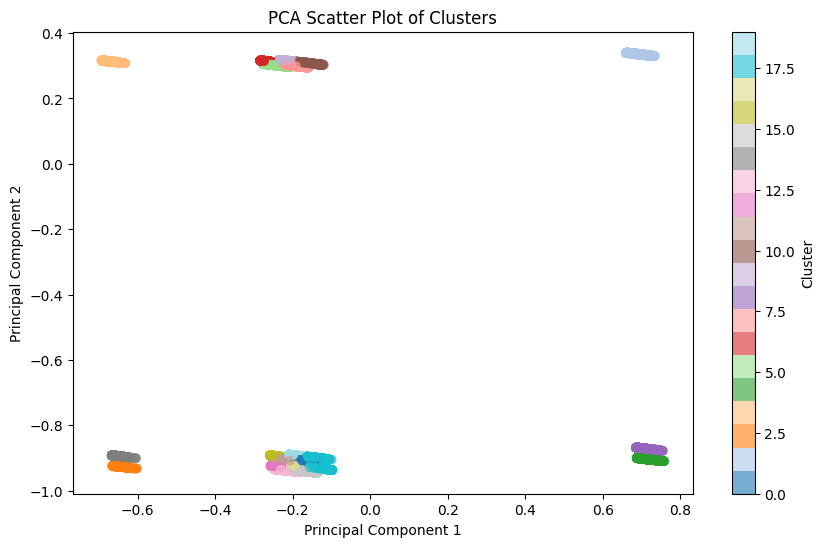

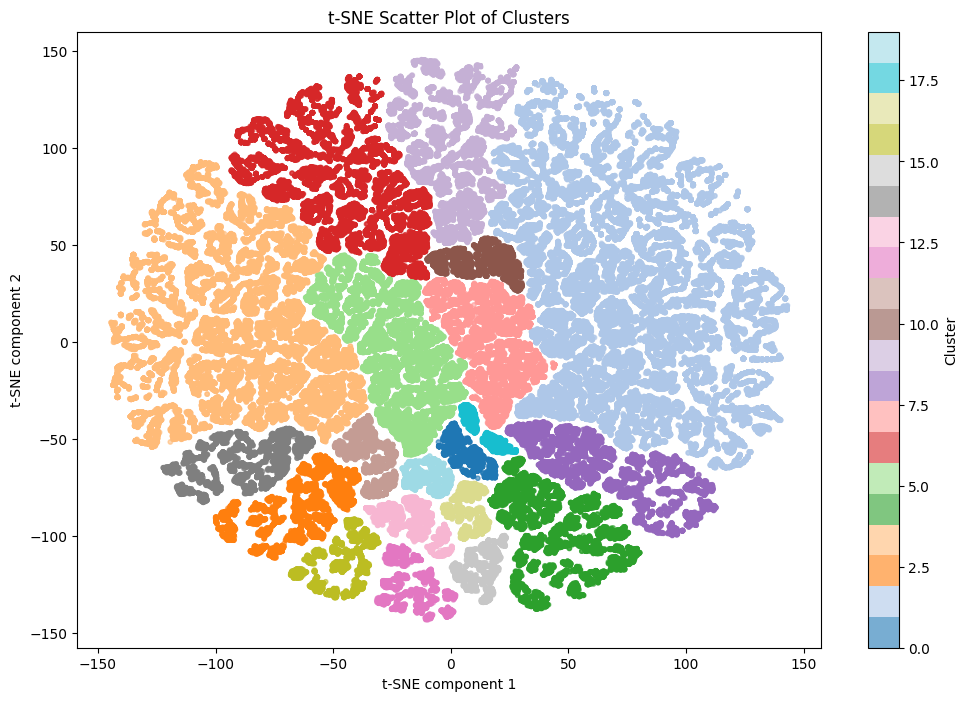

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 데이터 로드
df = pd.read_csv('../../renttherunway_data.csv')
print(f"전체 데이터 크기: {df.shape}")

# 원본 rating 분포 확인
print("원본 rating 고유값:", df['rating'].unique())

# 선택한 컬럼
selected_columns = ['user_id', 'item_id', 'fit', 'weight', 'rating', 'body type', 'height', 'size', 'age']
df = df[selected_columns]

# 데이터 분할: 학습(90%, 18만)와 새로운 데이터(10%, 2만)
train_df, new_df = train_test_split(df, test_size=0.1, random_state=42)
print(f"학습 데이터 크기: {train_df.shape}, 새로운 데이터 크기: {new_df.shape}")

# 새로운 데이터가 비어있는지 확인
if new_df.empty:
    print("오류: 새로운 데이터가 비어 있습니다. 데이터 분할을 확인하세요.")
    exit(1)

# 1. 단위 변환 및 전처리
def height_to_cm(height):
    if pd.isna(height):
        return np.nan
    try:
        feet, inches = height.split("'")
        inches = inches.replace('"', '').strip()
        return int(feet) * 30.48 + int(inches) * 2.54
    except:
        return np.nan

# 학습 데이터 전처리
train_df['height_cm'] = train_df['height'].apply(height_to_cm)
train_df['weight'] = train_df['weight'].astype(str).str.replace('lbs', '').str.strip()
train_df['weight'] = pd.to_numeric(train_df['weight'], errors='coerce')
train_df['weight_kg'] = train_df['weight'] * 0.453592

train_df['rating'] = pd.to_numeric(train_df['rating'], errors='coerce')
train_df['rating'] = train_df['rating'].replace([np.inf, -np.inf], np.nan)
rating_median = train_df['rating'].median()
train_df['rating'] = train_df['rating'].fillna(rating_median)
train_df['rating_5'] = (train_df['rating'] / 2).round().astype(int)
train_df['rating_5'] = train_df['rating_5'].clip(1, 5)

# rating_5 확인
print("학습 데이터 rating_5 고유값:", train_df['rating_5'].unique())

# weight_kg와 size 상관관계 확인
print("\nweight_kg와 size 상관계수:")
print(train_df[['weight_kg', 'size']].corr())

# size별 weight_kg 평균 계산 (학습 데이터)
size_weight_map = train_df.groupby('size')['weight_kg'].mean().to_dict()
overall_weight_mean = train_df['weight_kg'].mean()
print("\nsize별 weight_kg 평균:")
for size, mean_weight in size_weight_map.items():
    print(f"Size {size}: {mean_weight:.2f} kg")
print(f"전체 weight_kg 평균: {overall_weight_mean:.2f} kg")

# weight_kg 결측치 채우기 (size별 평균 사용)
def fill_weight(row, size_weight_map, overall_mean):
    if pd.isna(row['weight_kg']):
        return size_weight_map.get(row['size'], overall_mean)
    return row['weight_kg']

train_df['weight_kg'] = train_df.apply(lambda x: fill_weight(x, size_weight_map, overall_weight_mean), axis=1)


# 2. 결측치 처리 (weight_kg 제외)
numeric_columns = ['height_cm', 'rating_5', 'age', 'size']  # weight_kg 제거
for col in numeric_columns:
    mean_value = train_df[col].mean()
    train_df[col] = train_df[col].replace([np.inf, -np.inf], np.nan)
    train_df[col] = train_df[col].fillna(mean_value)
    print(f"{col} 열을 평균값 {mean_value:.2f}로 채웠습니다.")

categorical_columns = ['fit', 'body type']
for col in categorical_columns:
    mode_value = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_value)
    print(f"{col} 열을 최빈값 {mode_value}로 채웠습니다.")

print("\n학습 데이터 결측치:")
print(train_df.isna().sum())

# 3. 원-핫 인코딩
encoder_fit = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
fit_encoded_train = encoder_fit.fit_transform(train_df[['fit']])
fit_encoded_train_df = pd.DataFrame(fit_encoded_train, columns=encoder_fit.get_feature_names_out(['fit']), index=train_df.index)

encoder_body = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
body_encoded_train = encoder_body.fit_transform(train_df[['body type']])
body_encoded_train_df = pd.DataFrame(body_encoded_train, columns=encoder_body.get_feature_names_out(['body type']), index=train_df.index)

train_df = pd.concat([train_df, fit_encoded_train_df, body_encoded_train_df], axis=1)

# 4. 스케일링
scaler_dict = {}
scaled_columns = ['weight_kg', 'height_cm', 'size', 'age']  # rating_5 제외
for col in scaled_columns:
    scaler = MinMaxScaler()
    train_df[f'{col}_scaled'] = scaler.fit_transform(train_df[[col]])
    scaler_dict[col] = scaler

feature_columns = [f'{col}_scaled' for col in scaled_columns] + \
                  [col for col in train_df.columns if col.startswith(('fit_', 'body type_'))]
train_features_df = train_df[feature_columns]

print("\n학습용 피처 컬럼:", feature_columns)

plt.figure(figsize=(10, 5))
plt.hist(train_df['weight_kg_scaled'], bins=30, color='skyblue', edgecolor='black')
plt.title('Scaled Weight Distribution')
plt.xlabel('weight_kg_scaled')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. K-Means 클러스터링
# 엘보우 기법
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(train_features_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()
plt.close()

# K=20으로 설정
optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_df['cluster'] = kmeans.fit_predict(train_features_df)

# 실루엣 점수 계산 (학습)
train_silhouette = silhouette_score(train_features_df, train_df['cluster'])

# 6. 군집별 특성 분석
original_columns = ['weight_kg', 'height_cm', 'size', 'age', 'rating_5']
train_cluster_summary = train_df.groupby('cluster')[original_columns].mean()
print("\n학습 데이터 군집별 실제 값 평균:")
print(train_cluster_summary)

# 7. 상품 추천
cluster_items = train_df.groupby('cluster').apply(
    lambda x: x.nlargest(5, 'rating_5')[['item_id', 'rating_5']].to_dict('records')
)
print("\n군집별 상위 5개 추천 상품 (item_id, rating_5):")
for cluster, items in cluster_items.items():
    print(f"Cluster {cluster}:")
    for item in items:
        print(f"  Item ID: {item['item_id']}, Rating: {item['rating_5']}")

# 8. 추천 평가
# 학습 데이터 평가
precision_scores_train = []
recall_scores_train = []
K = 5
for cluster in train_df['cluster'].unique():
    train_items = set(train_df[(train_df['cluster'] == cluster) & (train_df['rating_5'] >= 4)]['item_id'])
    recommended_items = set(item['item_id'] for item in cluster_items.get(cluster, []))
    hits = len(train_items & recommended_items)
    precision = hits / K if K > 0 else 0
    recall = hits / len(train_items) if train_items else 0
    precision_scores_train.append(precision)
    recall_scores_train.append(recall)
f1_scores_train = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision_scores_train, recall_scores_train)]

# 고유 추천 상품 수
unique_items = set()
for cluster, items in cluster_items.items():
    unique_items.update(item['item_id'] for item in items)

# 출력 (요청된 순서)
print(f"학습 데이터 실루엣 점수: {train_silhouette:.3f}")
print(f"총 고유 추천 상품 수: {len(unique_items)}")

# 9. 새로운 데이터 처리
print(f"\n새로운 데이터 크기: {new_df.shape}")

# 새로운 데이터 전처리
new_df['height_cm'] = new_df['height'].apply(height_to_cm)
new_df['weight'] = new_df['weight'].astype(str).str.replace('lbs', '').str.strip()
new_df['weight'] = pd.to_numeric(new_df['weight'], errors='coerce')
new_df['weight_kg'] = new_df['weight'] * 0.453592
new_df['rating'] = pd.to_numeric(new_df['rating'], errors='coerce')
new_df['rating'] = new_df['rating'].replace([np.inf, -np.inf], np.nan)
new_df['rating'] = new_df['rating'].fillna(rating_median)
new_df['rating_5'] = (new_df['rating'] / 2).round().astype(int)
new_df['rating_5'] = new_df['rating_5'].clip(1, 5)

# 새로운 데이터 weight_kg 결측치 채우기
new_df['weight_kg'] = new_df.apply(lambda x: fill_weight(x, size_weight_map, overall_weight_mean), axis=1)

for col in numeric_columns:
    new_df[col] = new_df[col].replace([np.inf, -np.inf], np.nan)
    new_df[col] = new_df[col].fillna(train_df[col].mean())
for col in categorical_columns:
    new_df[col] = new_df[col].fillna(train_df[col].mode()[0])

fit_encoded_new = encoder_fit.transform(new_df[['fit']])
fit_encoded_new_df = pd.DataFrame(fit_encoded_new, columns=encoder_fit.get_feature_names_out(['fit']), index=new_df.index)
body_encoded_new = encoder_body.transform(new_df[['body type']])
body_encoded_new_df = pd.DataFrame(body_encoded_new, columns=encoder_body.get_feature_names_out(['body type']), index=new_df.index)
new_df = pd.concat([new_df, fit_encoded_new_df, body_encoded_new_df], axis=1)

for col in scaled_columns:
    new_df[f'{col}_scaled'] = scaler_dict[col].transform(new_df[[col]])
new_features_df = new_df[feature_columns]

# 군집 예측
new_df['cluster'] = kmeans.predict(new_features_df)
print("\n새로운 데이터 군집 분포:")
print(new_df['cluster'].value_counts())

# 새로운 데이터 실루엣 점수
new_silhouette = silhouette_score(new_features_df, new_df['cluster'])

# 새로운 데이터 평가
precision_scores_new = []
recall_scores_new = []
K = 5
for cluster in new_df['cluster'].unique():
    test_items = set(new_df[(new_df['cluster'] == cluster) & (new_df['rating_5'] >= 4)]['item_id'])
    recommended_items = set(item['item_id'] for item in cluster_items.get(cluster, []))
    hits = len(test_items & recommended_items)
    precision = hits / K if K > 0 else 0
    recall = hits / len(test_items) if test_items else 0
    precision_scores_new.append(precision)
    recall_scores_new.append(recall)
f1_scores_new = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision_scores_new, recall_scores_new)]

# 새로운 데이터 높은 평점 비율
feedback_scores_new = []
for cluster in new_df['cluster'].unique():
    recommended_items = set(item['item_id'] for item in cluster_items.get(cluster, []))
    cluster_data = new_df[(new_df['cluster'] == cluster) & (new_df['item_id'].isin(recommended_items))]
    if not cluster_data.empty:
        feedback_score = (cluster_data['rating_5'] >= 4).mean()
        feedback_scores_new.append(feedback_score)
    else:
        feedback_scores_new.append(0)

# 새로운 데이터 출력
print(f"새로운 데이터 실루엣 점수: {new_silhouette:.3f}")
print(f"새로운 데이터 추천 상품의 높은 평점 비율 (평균): {np.mean(feedback_scores_new):.3f}")

# 추천 상품 출력
print("\n새로운 데이터에 대한 군집별 추천 상품:")
for cluster in new_df['cluster'].unique():
    print(f"Cluster {cluster} 추천 상품:")
    for item in cluster_items.get(cluster, []):
        print(f"  Item ID: {item['item_id']}, Rating: {item['rating_5']}")


# PCA 시각화 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(train_features_df)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1],
                      c=train_df['cluster'], cmap='tab20', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
plt.close()

# t-SNE 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_features = tsne.fit_transform(train_features_df)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_features[:, 0], tsne_features[:, 1],
                      c=train_df['cluster'], cmap='tab20', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Scatter Plot of Clusters')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()
plt.close()


# csv 저장
# train_df.to_csv('train_clustered_data.csv', index=False)
# new_df.to_csv('new_clustered_data.csv', index=False)

# k=2~25 결과: 13~20이 0.7이상 (결과 확인됨으로 주석처리)
# 실루엣 점수 플롯
# silhouette_scores = []
# K_silhouette_range = range(2, 26)  # K=2~25
# for k in K_silhouette_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(train_features_df)
#     score = silhouette_score(train_features_df, labels)
#     silhouette_scores.append(score)
#     print(f"K={k} 실루엣 점수: {score:.3f}")

# 실루엣 시각화 확인
# plt.figure(figsize=(10, 6))
# plt.plot(K_silhouette_range, silhouette_scores, marker='o')
# plt.title('Silhouette Score for Different K')
# plt.xlabel('Number of clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.savefig('plots/silhouette_plot.png')
# plt.show()
# plt.close()

# # 9. 시각화(데이터 전처리 시 확인, 결과 확인됨으로 해제)
# for col in original_columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=train_df, x=col, hue='cluster', multiple='stack', bins=20, palette='tab20')
#     plt.title(f'{col} Distribution by Cluster (Train, Original Units)')
#     plt.savefig(f'plots/train_{col}_cluster_distribution.png')
#     plt.show()
#     plt.close()